## House Prices: Advanced Regression Techniques - Kaggle
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

해당 경진대회는 아래 논문의 데이터셋으로 만들어졌습니다.
http://jse.amstat.org/v19n3/decock.pdf

또한, 사이킷런 공식문서에 있는 보스턴 주택가격 데이터셋도 같은 데이터셋을 기반으로 만들어져 있습니다.

## 라이브러리 로드

In [1]:
# pandas, seaborn, numpy 를 불러옵니다.
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# seaborn style 설정
sns.set(font="AppleGothic", rc={"axes.unicode_minus": False})

## 데이터셋 가져오기

In [3]:
# train 데이터를 불러옵니다.
train = pd.read_csv("data/train.csv", index_col="Id")
train.shape

(1460, 80)

In [4]:
# 컬럼이 모두 보이도록 설정합니다.
pd.options.display.max_columns = 100

In [5]:
# 미리보기를 합니다.
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# test 데이터셋을 불러오고 갯수를 출력해 봅니다.

test = pd.read_csv("data/test.csv", index_col="Id")
test.shape

(1459, 79)

In [7]:
# test 데이터셋을 미리보기 합니다.
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# set을 활용해서 컬럼을 비교합니다.
set(train.columns.tolist()) - set(test.columns.tolist())

{'SalePrice'}

## EDA

### pandas-profiling

[pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

In [9]:
# pandas_profiling 을 통해 ProfileReport 로 간단한 eda 리포트를 만들어 봅니다.
# from pandas_profiling import ProfileReport

# profile = ProfileReport(train)
# profile.to_file(output_file="house_train_profile.html")

### histogram

In [10]:
# 전체 변수에 대한 histogram을 그립니다. bins 옵션으로 막대의 수를 조정합니다.

# h = train.hist(figsize=(15, 15), bins=100)

### 정답값 label 따로보기

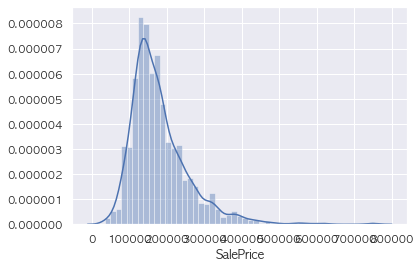

In [11]:
# SalePrice 의 distplot을 봅니다.
sns.distplot(train["SalePrice"])

In [12]:
# SalePrice 의 왜도와 첨도를 구합니다.
print("왜도(Skewness):", train['SalePrice'].skew())
print("첨도(Kurtosis):", train['SalePrice'].kurt())

왜도(Skewness): 1.8828757597682129
첨도(Kurtosis): 6.536281860064529


In [13]:
# SalePrice를 정규분포로 변환하고 왜도와 첨도를 구합니다.
log1p_saleprice = np.log1p(train["SalePrice"])
print("왜도(Skewness):", log1p_saleprice.skew())
print("첨도(Kurtosis):", log1p_saleprice.kurt())

왜도(Skewness): 0.12134661989685329
첨도(Kurtosis): 0.809519155707878


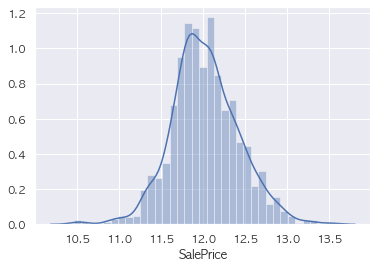

In [14]:
# SalePrice 를 정규분포 형태로 그립니다.
sns.distplot(log1p_saleprice)

### 결측치 보기
* [Missing data - Wikipedia](https://en.wikipedia.org/wiki/Missing_data)

In [15]:
# 결측치가 얼마나 되는지 봅니다.
train_null = train.isnull().sum()
train_null = train_null.sort_values()
train_null

MSSubClass          0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 80, dtype: int64

### 집값과 상관계수가 높은 데이터 보기

In [16]:
# 상관계수를 구하기 전에 수치형 데이터만 불러옵니다.
num_type = train.dtypes[train.dtypes != "object"].index
num_type

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
# 상관계수의 값 차이를 style.background_gradient() 로 색상으로 구분해서 봅니다.
corr = train[num_type].corr()
corr.style.background_gradient()

In [18]:
# SalePrice와 상관계수가 특정 수치 이상인 데이터만 봅니다.
price_corr = corr["SalePrice"]
price_corr_high = price_corr[abs(price_corr) > 0.6].sort_values()
price_corr_high

1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [19]:
# SalePrice와 상관계수가 특정 수치 이상인 변수의 인덱스를 봅니다.
price_corr_high.index

Index(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual', 'SalePrice'],
      dtype='object')

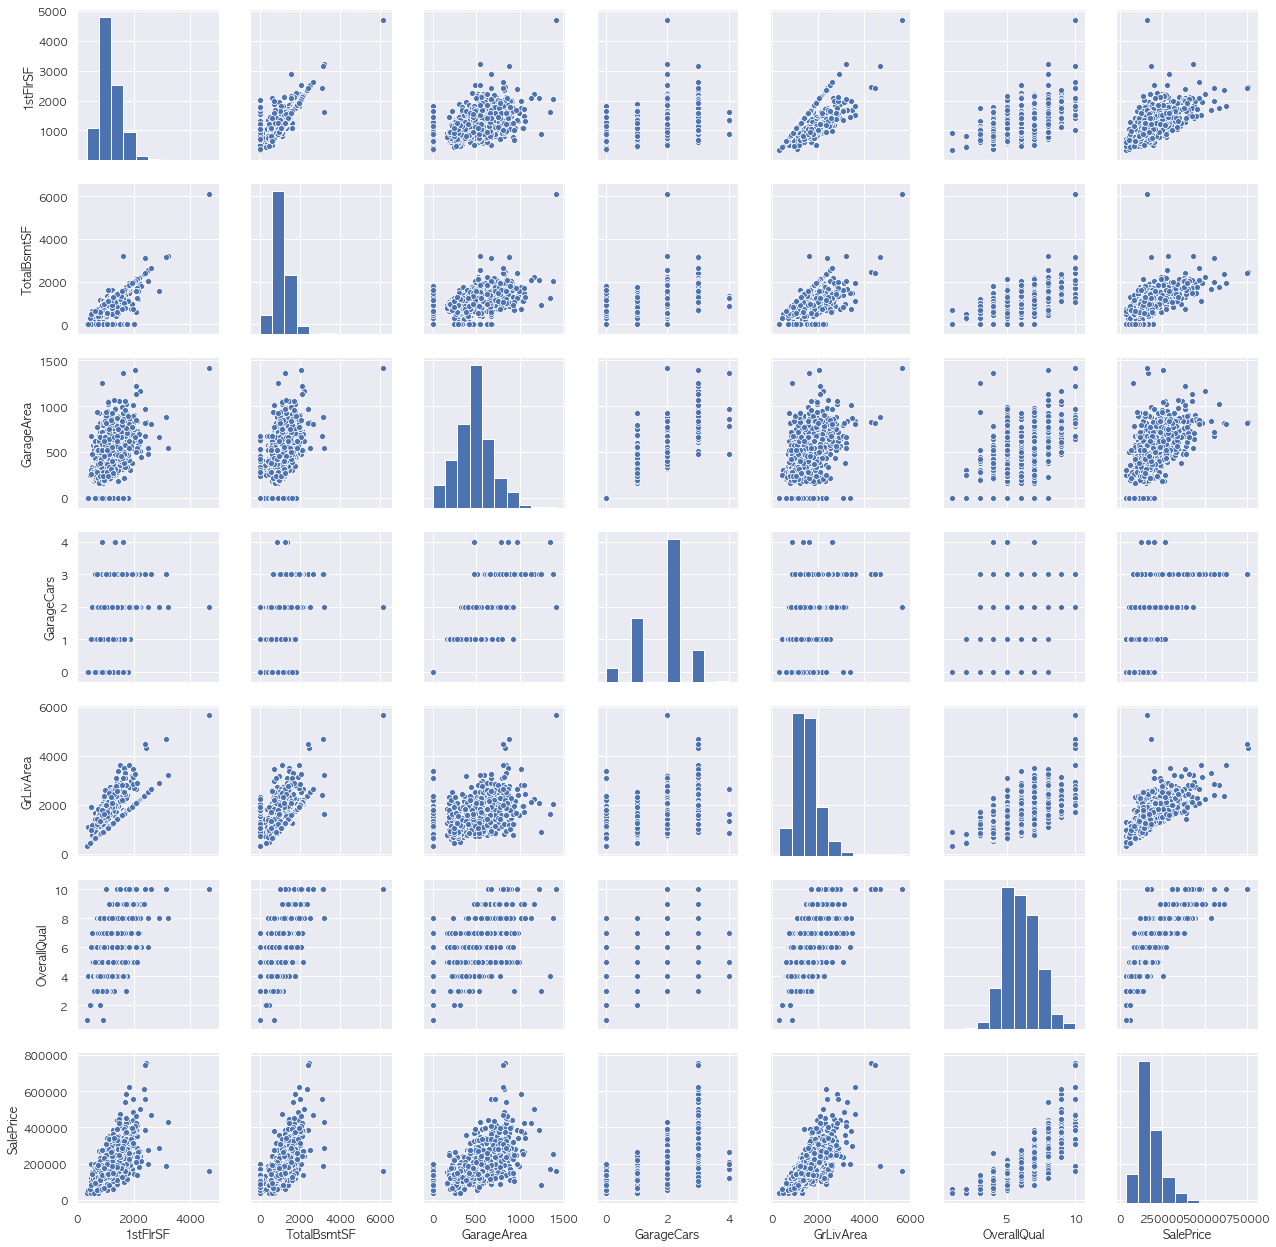

In [20]:
# pairplot을 모든 변수에 대해 그리면 오래 걸립니다.
# 위에서 그렸던 상관계수가 높은 변수만 그려봅니다.
# 이상치, 상관계수, 왜도, 첨도 등을 한눈에 볼 수 있습니다.
sns.pairplot(train[price_corr_high.index])

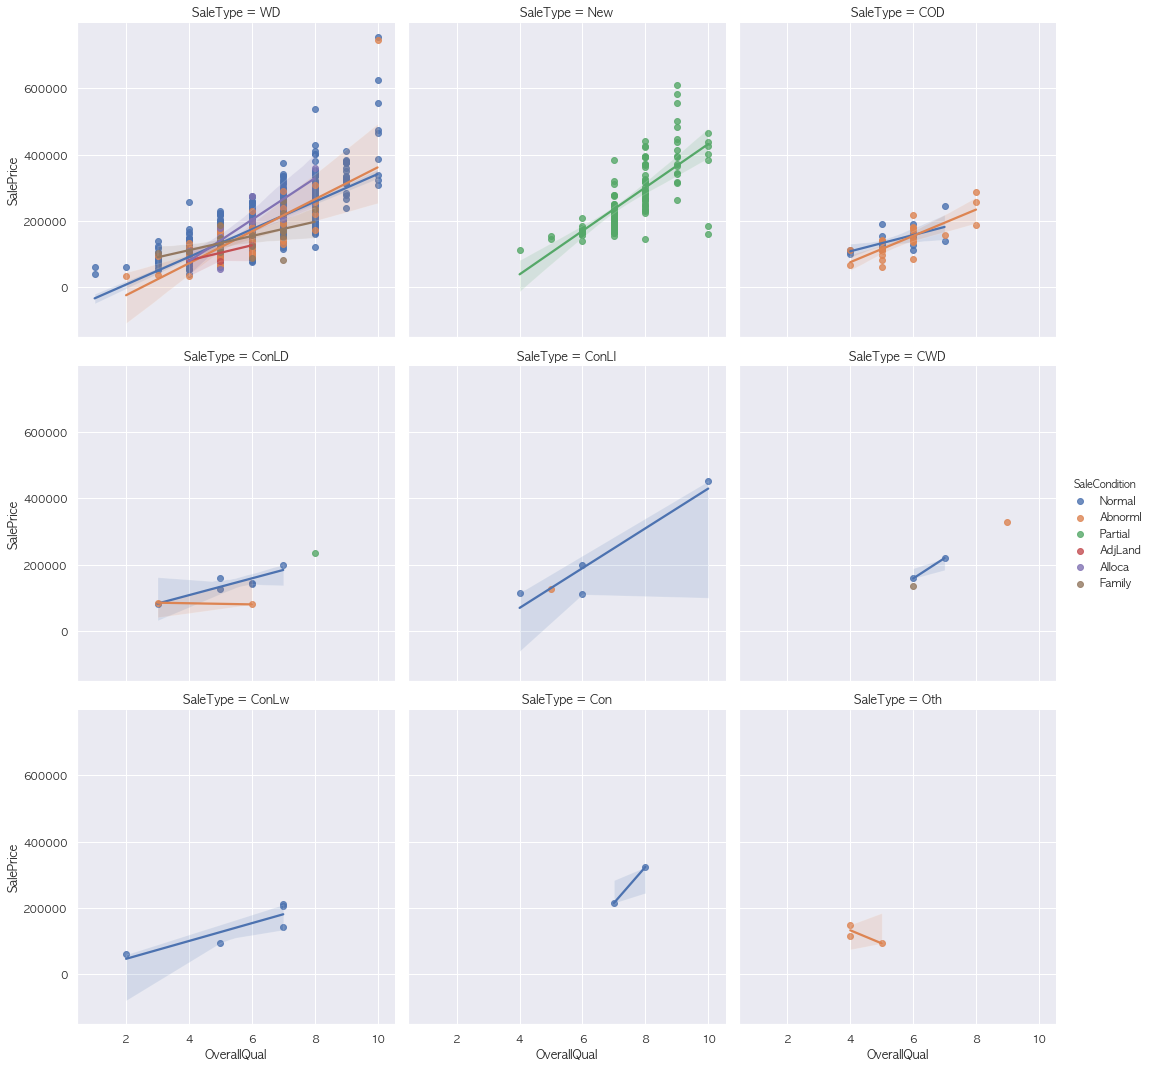

In [21]:
# lmplot으로 상관계수가 SalePrice와 가장 높은 변수의 회귀선을 그립니다.
# 이때 범주형 변수인 SaleCondition, SaleType 에 따라 색상과 컬럼을 따로 그립니다.
sns.lmplot(data=train, x="OverallQual", y="SalePrice", 
           hue="SaleCondition", col="SaleType", col_wrap=3, truncate=True)

### 왜도 Skewness

* [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)
* 확률 이론 및 통계학에서, 비대칭도(非對稱度, skewness) 또는 왜도(歪度)실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

In [22]:
# 왜도가 특정 수치 이상인 데이터를 따로 봅니다.
# 마이너스 값이 나올 수 있기 때문에 절대값을 씌우고 봅니다.
# 왜도가 큰 값을 skewed_col 변수에 담습니다.
train_skew = train.skew()
skewed_col = train_skew[abs(train_skew) > 5].index.tolist()
skewed_col

['LotArea', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

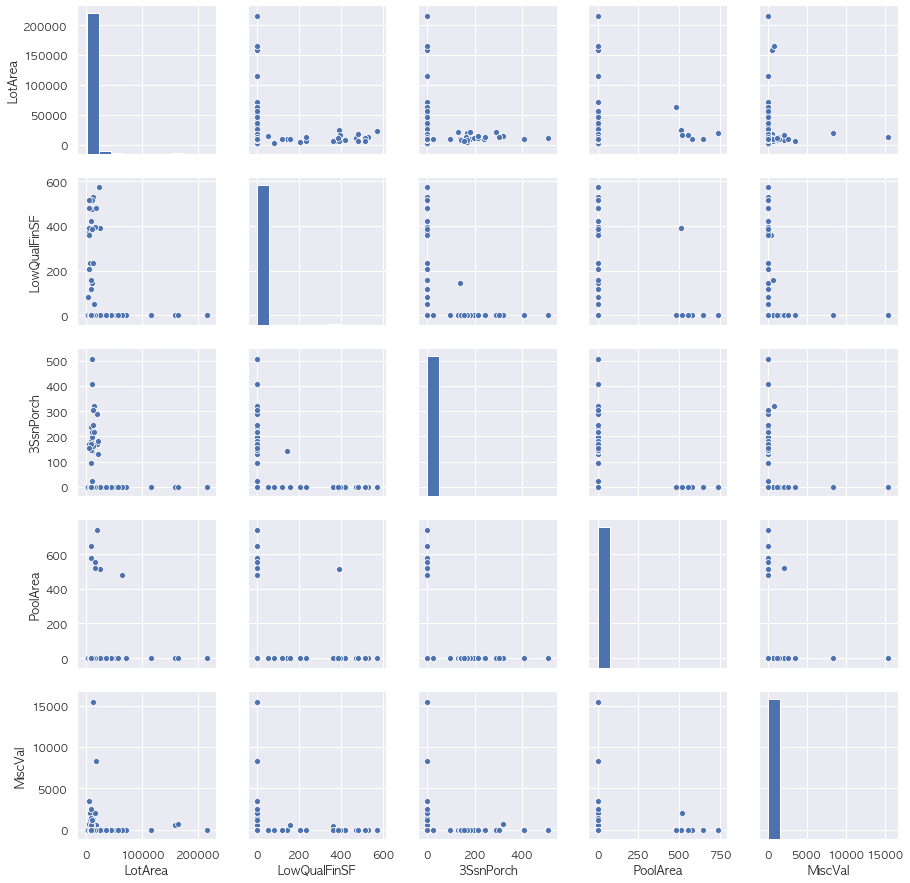

In [23]:
# 왜도가 큰 값만 따로 pairplot으로 그립니다.
sns.pairplot(train[skewed_col])

### 범주형 변수 보기

In [24]:
# object 타입의 변수만 따로 봅니다. 
col_object = train.dtypes[train.dtypes == "object"]
col_object = col_object.index.tolist()
len(col_object)

43

In [25]:
# 범주형 변수의 결측치만 다로 봅니다.
train[col_object].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [26]:
# 범주형 값의 결측치를 "None" 으로 채웁니다.
# train[col_object] = train[col_object].fillna("None")
# train[col_object].isnull().sum()

In [27]:
# get_dummies 로 원핫인코딩을 합니다.
# train_ohe, test_ohe 이라는 새로운 변수에 담습니다.
train_ohe = pd.get_dummies(train)
test_ohe = pd.get_dummies(test)

In [28]:
# 원핫인코딩 후 기존 데이터와 갯수를 비교합니다.
print(train.shape)
print(train_ohe.shape)
print(test.shape)
print(test_ohe.shape)

(1460, 80)
(1460, 289)
(1459, 79)
(1459, 270)


## Feature Engineering
### 수치형 타입만 가져오기
* 모든 컬럼을 feature 로 사용하기 전에 바로 사용할 수 있는 수치 데이터를 먼저 사용합니다.

In [29]:
# feature_names list 만들기
test_dtype = test.dtypes
feature_names = test.dtypes[test.dtypes != "object"].index.tolist()
feature_names

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [30]:
# feature_names = test_ohe.columns.tolist()
# len(feature_names)

In [31]:
# label_name 변수에 예측에 사용할 정답 값 지정하기
label_name = "SalePrice"

### Feature 만들기
* 학습과 예측에 사용할 데이터셋 만들기

In [32]:
# X_train 만들기 - 학습에 사용할 데이터셋 예) 기출문제
X_train = train[feature_names]
X_train.shape

(1460, 36)

In [33]:
# y_train 만들기 - 학습에 사용할 정답값 예) 기출문제의 정답
y_train = train[label_name]
y_train = np.log(y_train + 1)
y_train

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
1456    12.072547
1457    12.254868
1458    12.493133
1459    11.864469
1460    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [34]:
# X_test - 예측에 사용할 데이터셋 예) 실전 시험문제
X_test = test[feature_names]

### 수치형 변수 결측치 채우기
* 임의의 값으로 채우기
* 평균, 중앙값으로 채우기
* 제거하기
* 머신러닝 기법으로 채우기
* [Imputing missing values before building an estimator — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py)

In [35]:
# X_train의 결측치를 fillna 로 채우기
X_train = X_train.fillna(0)
X_train.shape

(1460, 36)

In [36]:
# X_test의 결측치를 fillna 로 채우기
X_test = X_test.fillna(0)
X_test.shape

(1459, 36)

## 머신러닝으로 예측하기

In [37]:
# 머신러닝 모델을 불러옵니다.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### KFold 로 Cross Validation 하기

In [38]:
# KFold 를 사용해서 분할을 나눕니다.
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

### cross_val_score 와 cross_val_predict 로 점수 구하기

In [39]:
# cross_val_score 로 점수를 계산합니다.
# scoring='neg_root_mean_squared_error'
# cv_results 에 결과값을 담고 평균을 구합니다.

from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(model, X_train, y_train, cv=kf, 
                             scoring='neg_root_mean_squared_error')
np.mean(cv_results)

-0.15093749514227345

In [40]:
# cross_val_predict 로 예측 결과를 구합니다.

from sklearn.model_selection import cross_val_predict

y_cv_pred = cross_val_predict(model, X_train, y_train, cv=kf)
y_cv_pred[:5]

array([12.22467233, 12.03848268, 12.30589466, 12.16459918, 12.65472099])

### RMSE

In [41]:
# 직접 RMSE로 오차를 구합니다.
np.sqrt(np.square(y_train - y_cv_pred).mean())

0.14750164697920182

### 실제값과 예측값 비교하기

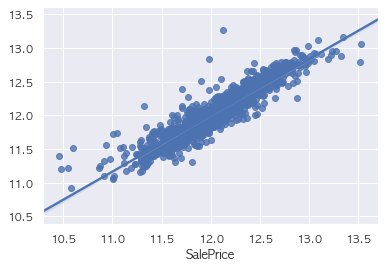

In [42]:
# regplot 으로 예측값에 대한 회귀선 그리기

sns.regplot(x=y_train, y=y_cv_pred)

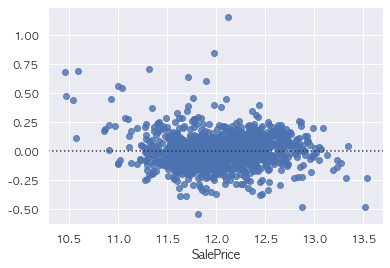

In [43]:
sns.residplot(x=y_train, y=y_cv_pred, robust=False)

In [44]:
# r2스코어로 회귀선의 기울기 구하기
from sklearn.metrics import r2_score

r2_score(y_train, y_cv_pred)

0.8635517304613949

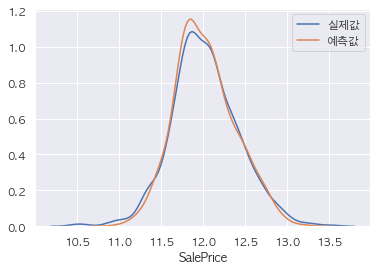

In [45]:
# distplot의 kdeplot으로 실제값과 예측값 비교하기

sns.distplot(y_train, hist=False, label="실제값")
sns.distplot(y_cv_pred, hist=False, label="예측값")

## 학습(훈련)과 예측

In [46]:
# 학습하고 예측하기
# 모의고사를 풀어보고 바로 실전을 풀어봅니다.

y_pred = model.fit(X_train, y_train).predict(X_test)
y_pred[:5]

array([11.73179553, 11.95303279, 12.10031671, 12.10931818, 12.19377307])

### 피처 중요도 보기

In [47]:
# 피처 중요도 보기
feature_importances = model.feature_importances_

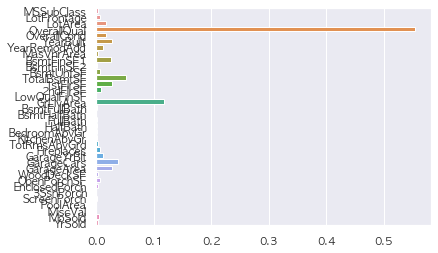

In [48]:
# 시각화 하기
sns.barplot(x=feature_importances, y=feature_names)

## Submit

In [49]:
# 제출 파일 양식을 불러옵니다.
submit = pd.read_csv("data/sample_submission.csv", index_col="Id")
submit.head()

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977


In [50]:
# 정답을 옮겨 적습니다.
submit[label_name] = np.exp(y_pred) - 1
submit.head()

,SalePrice
Id,
1461,124465.953629
1462,155286.387869
1463,179927.838145
1464,181554.774304
1465,197554.151773


In [51]:
# csv 파일로 저장합니다.
submit.to_csv("data/submission.csv")

In [52]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv("data/submission.csv").head()

,Id,SalePrice
0,1461,124465.953629
1,1462,155286.387869
2,1463,179927.838145
3,1464,181554.774304
4,1465,197554.151773
